# COS 322 Fall 2025 - Homework 6
## Support Vector Machine (SVM) and Random Forest (RF)


This assignment will help you understand and apply the SVM algorithm and the Random Forest algorithm.

Please complete all required tasks in a Jupyter Notebook (.ipynb file).
When you are finished, submit your completed .ipynb file to BrightSpace.


**Due: Nov 17th, 11:59 PM**

Kind reminder: Late submissions will incur a 10% deduction per day past the deadline. Please plan accordingly and submit your work on time!

**Part 1 SVM [40pt]**

Dataset: Breast_cancer, which is built into scikit-learn, so you can directly import it using the following code:

```python
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```


**Task1 [20pt]**
- Train SVM with Different Kernels(linera, poly, rbf), predict on both train and test sets, and display and compare their performance metric
- Report:
  - Which kernel performs best?
  - Does one kernel overfit (very high train accuracy but low test accuracy)?

**Task2 [20pt]**
- Use GridSearchCV to find the best parameters for the RBF kernel(tuning values of C and gamma).
- Summarize the best parameters and the corresponding model performance.

In [1]:
# PLEASE START YOUR 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
Y = cancer.target
models = {
    "SVM RBF": SVC(kernel='rbf', gamma=0.1, C=1.0),
    "SVM Poly": SVC(kernel='poly', gamma=0.1, C=1.0),
    "SVM Linear": SVC(kernel='linear', gamma=0.1, C=1.0)
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    metrics = {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred)
    }
    results.append(metrics)

# Display results nicely
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Confusion matrices
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    print(f"\n{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

        Model  Train Accuracy  Test Accuracy  Precision    Recall  F1 Score
0     SVM RBF        0.984925       0.964912   0.981132  0.962963  0.971963
1    SVM Poly        0.987437       0.964912   0.972222  0.972222  0.972222
2  SVM Linear        0.987437       0.959064   0.980952  0.953704  0.967136

SVM RBF Confusion Matrix:
[[ 61   2]
 [  4 104]]

SVM Poly Confusion Matrix:
[[ 60   3]
 [  3 105]]

SVM Linear Confusion Matrix:
[[ 61   2]
 [  5 103]]


Observation: Looks like all models perform better in training than during testing.

In [2]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':    [0.1, 1, 10, 100, 1000],
    'gamma': [1e-3, 1e-2, 1e-1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest RBF SVM Parameters:")
print(grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)



Best RBF SVM Parameters:
{'C': 10, 'gamma': 0.01}
Best CV Accuracy: 0.9824999999999999


With best parameters C:10 Gamma=0.01, our best model cross validates at over 98%.

**Part 2 [60pt]**

**Dataset: Default of Credit Card Clients Dataset**

Please click this link to download the dataset: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 30,000 samples, 23 features.

**Goal**: Predict whether a credit card holder will default on payment next month

**Target variable**: default.payment.next.month (1 = Default, 0 = No Default)


**Task**
- Train a baseline Random Forest Classifier on the given dataset and evaluate its performance on both the training and test sets.
- Use GridSearchCV to optimize key hyperparameters: n_estimators (number of trees), max_depth, min_samples_split, min_samples_leaf.
- Compare the tuned model’s performance with the baseline model.
  - Report accuracy, precision, recall, and F1-score for both models.
  - Discuss whether the tuned model shows improvement or signs of overfitting.
- Visualize and interpret the top 10 most important features contributing to the Random Forest’s predictions.



In [4]:
# PLEASE START YOUR SOLUTION
import os
from sklearn.ensemble import RandomForestClassifier
file = "~/Downloads/UCI_Credit_Card.csv"
df = pd.read_csv(os.path.expanduser(file))
df
param_grid = {
    'n_estimators':    [100, 200, 300],   
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
}
rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,       # let trees expand fully
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)
X = df.drop('default.payment.next.month',axis=1)
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train
rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.822
Precision: 0.6570631970260223
Recall: 0.36443298969072163
F1 Score: 0.46883289124668437

Confusion Matrix:
[[6691  369]
 [1233  707]]


## Do not run the cell below if you have a weak computer!

In [12]:

param_grid_small = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None,'balanced']
}

grid = GridSearchCV(rf,param_grid_small,cv=5,scoring='accuracy',n_jobs = -1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions
y_train_pred_new = best_rf.predict(X_train)
y_test_pred_new = best_rf.predict(X_test)

# Metrics
print("Train Accuracy of tuned model:", accuracy_score(y_train, y_train_pred_new))
print("Test Accuracy of tuned model:", accuracy_score(y_test, y_test_pred_new))
print("Precision of tuned model:", precision_score(y_test, y_test_pred_new))
print("Recall of tuned model:", recall_score(y_test, y_test_pred_new))
print("F1 Score of tuned model:", f1_score(y_test, y_test_pred_new))

print("\nConfusion Matrix of tuned model:")
print(confusion_matrix(y_test, y_test_pred_new))

Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.8190000000000002
Train Accuracy of tuned model: 0.8610476190476191
Test Accuracy of tuned model: 0.8251111111111111
Precision of tuned model: 0.6822709163346613
Recall of tuned model: 0.35309278350515466
F1 Score of tuned model: 0.46535326086956524

Confusion Matrix of tuned model:
[[6741  319]
 [1255  685]]


For our first model:
Train Accuracy: 1.0 -> obvious signs of overfitting
Test Accuracy: 0.822

Second model: 
Best CV Accuracy: 0.8190000000000002
Train Accuracy of tuned model: 0.8610476190476191 -> less overfitting
Test Accuracy of tuned model: 0.8251111111111111 -> better accuracy

C:\Users\owner\AppData\Local\Temp\ipykernel_12076\1806255751.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


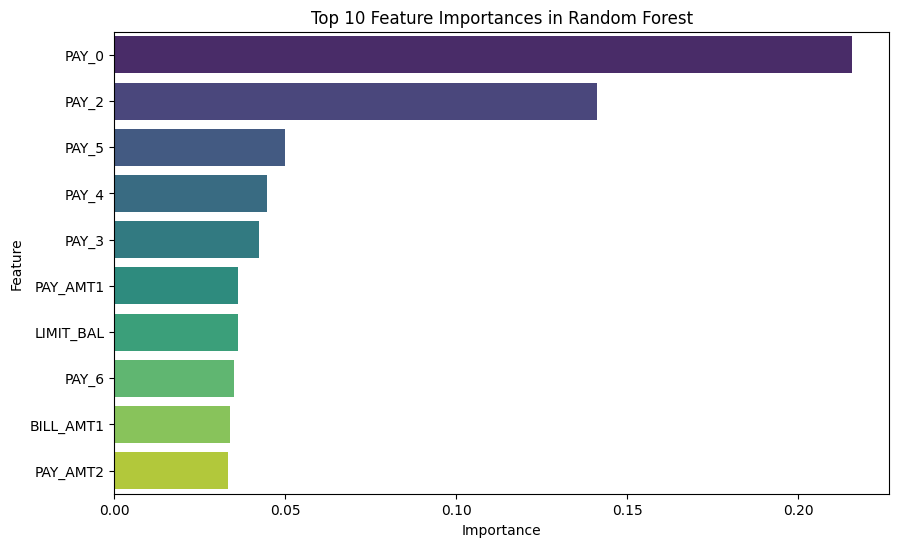

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_


feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})


top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
df